# <center>Trabajo Práctico N°1 : Reservas de Hotel</center>

**Grupo:** N°28 - The Kingdom

**Checkpoint N°**: 4

**Alumnos**:


*   Jurgens, Cecilia Ines
*   Schipani, Martin Sebastian
*   Soto, Marylin Nicole

**Corrector:** Franco Mastelli

---


# Importacion de Librerias

In [1]:
!pip install keras==2.12.0
!pip uninstall tensorflow -y
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.
Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorf

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import sklearn as sk
import random

from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

#Importacion datasets

In [34]:
df_hotel_train_original = pd.read_csv('df_hotel_train_clean.csv')
df_hotel_train = df_hotel_train_original.copy()
df_hotel_test_original = pd.read_csv('df_hotel_test_clean.csv')
df_hotel_test = df_hotel_test_original.copy()

In [35]:
df_test = pd.read_csv('hotels_test.csv')

In [36]:
print("El dataframe train tiene "f" {df_hotel_train.shape[0]} ""filas y "f"{df_hotel_train.shape[1]} ""columnas.")
print("El dataframe test tiene "f" {df_hotel_test.shape[0]} ""filas y "f"{df_hotel_test.shape[1]} ""columnas.")

El dataframe train tiene  59640 filas y 60 columnas.
El dataframe test tiene  26535 filas y 59 columnas.


# Red Neuronal 1

Realizamos una pratcion del 20% del dataframe de entrenamiento.

In [37]:
df_hotel_train_x = df_hotel_train.drop(['is_canceled'], axis = 'columns', inplace = False)
df_hotel_train_y = df_hotel_train['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(df_hotel_train_x,
                                                    df_hotel_train_y,
                                                    test_size= 0.2,
                                                    random_state = 28)

## Normalizacion de los datos

Normalizamos los datos con un StandardScaler  y asi mejorar el rendimiento.

In [38]:
x_train.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'reserved_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_days', 'hotel_Resort Hotel',
       'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'country_BEL',
       'country_BRA', 'country_CHE', 'country_CHN', 'country_CN',
       'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR',
       'country_IRL', 'country_ISR', 'country_ITA', 'country_NLD',
       'country_NOR', 'country_POL', 'country_PRT', 'country_RUS',
       'country_SWE', 'country_USA', 'country_other',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'marke

In [39]:
valores_numericos_normalizar = ['lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
                                'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
                                'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
                                'reserved_room_type', 'booking_changes', 'agent','days_in_waiting_list', 'adr',
                                'required_car_parking_spaces', 'total_of_special_requests', 'total_days']

In [40]:
df_predic_normalizar = df_hotel_test[valores_numericos_normalizar]
df_train_norm = x_train[valores_numericos_normalizar]
df_test_norm = x_test[valores_numericos_normalizar]

In [41]:
scaler = StandardScaler()
scaler.fit(df_train_norm)

StandardScaler()

In [42]:
x_train_transform_1 = scaler.transform(df_train_norm)
x_test_transform_1 = scaler.transform(df_test_norm)
df_predict_transform_1 = scaler.transform(df_predic_normalizar)

In [43]:
x_train_escalado = x_train.copy()
x_test_escalado = x_test.copy()
df_test_escalado = df_hotel_test.copy()

In [44]:
for i in range(len(valores_numericos_normalizar)):
  x_train_escalado[valores_numericos_normalizar[i]] = x_train_transform_1[:,i]
  x_test_escalado[valores_numericos_normalizar[i]] = x_test_transform_1[:,i]
  df_test_escalado[valores_numericos_normalizar[i]] = df_predict_transform_1[:,i]

## Busqueda de Hiperparametros

In [50]:
from keras.layers.serialization import activation
d_in = len(x_train_escalado.columns)
cant_classes = len(np.unique(x_train))

def create_model_nn(neuronas, learning_rate, beta_1, beta_2, epsilon):
  model_nn = keras.Sequential([
      keras.layers.Dense(d_in, input_shape = (d_in,)),
      keras.layers.Dense(neuronas, activation = 'tanh'),
      keras.layers.Dense(1, activation = 'sigmoid')
  ])

  model_nn.compile(
      optimizer = keras.optimizers.Nadam(learning_rate = learning_rate,
                                         beta_1 = beta_1,
                                         beta_2 = beta_2,
                                         epsilon = epsilon),
      loss = 'binary_crossentropy',
      metrics = ['AUC'],
  )
  return model_nn


nn_clasificador = KerasClassifier(build_fn = create_model_nn, verbose = 3)

params_grid = {
    'neuronas': list(range(10,60)),
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'beta_1': [0.8, 0.85, 0.9, 0.95, 0.99],
    'beta_2': [0.99, 0.999],
    'epsilon': [1e-6, 1e-7, 1e-8, 1e-9],
    'batch_size':[5, 10, 15, 20, 25, 30, 35, 40],
    #'epochs': [100, 200]
}

folds = 5

kfoldcv = StratifiedKFold(n_splits = folds)
scorer_fn = make_scorer(sk.metrics.f1_score)

randomcv = RandomizedSearchCV(estimator = nn_clasificador,
                              param_distributions = params_grid,
                              scoring = scorer_fn,
                              cv = kfoldcv,
                              #error_score = 'raise',
                              random_state = 28)

nn_random = randomcv.fit(x_train_escalado, y_train)

299/299 [==============================] - 1s 1ms/step


In [51]:
print('Mejores hiperparametros: ', nn_random.best_params_)
print(nn_random.best_score_)

Mejores hiperparametros:  {'neuronas': 27, 'learning_rate': 0.001, 'epsilon': 1e-08, 'beta_2': 0.99, 'beta_1': 0.85, 'batch_size': 20}
0.801950521103071


In [52]:
best_fit = nn_random.best_estimator_
predict_y_test = best_fit.predict(x_test_escalado)

373/373 [==============================] - 1s 2ms/step


## Entrenamiento

In [54]:
d_in = len(x_train_escalado.columns)
cant_classes = len(np.unique(x_train))

nn_model = keras.Sequential([
    keras.layers.Dense(60, input_shape = (d_in,)),
    keras.layers.Dense(29, activation = 'tanh'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

nn_model.summary()

Model: "sequential_157"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_471 (Dense)           (None, 60)                3600      
                                                                 
 dense_472 (Dense)           (None, 29)                1769      
                                                                 
 dense_473 (Dense)           (None, 1)                 30        
                                                                 
Total params: 5,399
Trainable params: 5,399
Non-trainable params: 0
_________________________________________________________________


In [55]:
nn_model.compile(
    optimizer = keras.optimizers.Nadam(learning_rate = 0.001, beta_1 = 0.85, beta_2 = 0.99, epsilon = 1e-08),
    loss = 'binary_crossentropy',
    metrics = ['AUC']
)

callback = keras.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.001, patience = 10)
cant_epochs = 100
nn_model_history = nn_model.fit(x_train_escalado, y_train, epochs = cant_epochs, batch_size = 20, verbose = True, callbacks = [callback])


Epoch 1/100
2386/2386 [==============================] - 9s 3ms/step - loss: 0.4005 - auc: 0.8921
Epoch 2/100
2386/2386 [==============================] - 10s 4ms/step - loss: 0.3578 - auc: 0.9151
Epoch 3/100
2386/2386 [==============================] - 7s 3ms/step - loss: 0.3441 - auc: 0.9223
Epoch 4/100
2386/2386 [==============================] - 8s 3ms/step - loss: 0.3351 - auc: 0.9269
Epoch 5/100
2386/2386 [==============================] - 5s 2ms/step - loss: 0.3292 - auc: 0.9297
Epoch 6/100
2386/2386 [==============================] - 8s 3ms/step - loss: 0.3252 - auc: 0.9316
Epoch 7/100
2386/2386 [==============================] - 6s 2ms/step - loss: 0.3219 - auc: 0.9329
Epoch 8/100
2386/2386 [==============================] - 5s 2ms/step - loss: 0.3189 - auc: 0.9343
Epoch 9/100
2386/2386 [==============================] - 8s 3ms/step - loss: 0.3171 - auc: 0.9350
Epoch 10/100
2386/2386 [==============================] - 5s 2ms/step - loss: 0.3143 - auc: 0.9363
Epoch 11/100
2386/

## Graficos

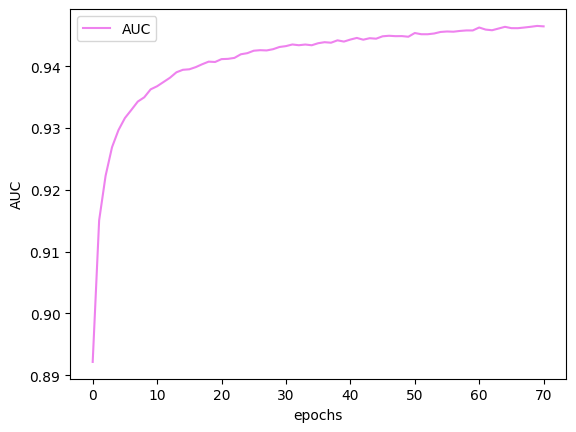

In [56]:
epochs = range (len(nn_model_history.history['auc']))

plt.plot(epochs, nn_model_history.history['auc'], color = 'violet', label ='AUC')
plt.xlabel('epochs')
plt.ylabel('AUC')
plt.legend()

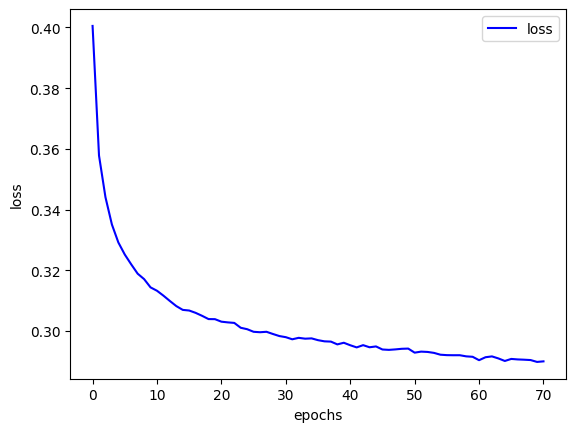

In [57]:
epochs = range(len(nn_model_history.history['loss']))
plt.plot(epochs, nn_model_history.history['loss'], color = 'blue', label = 'loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## Prediccion

373/373 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5838
           1       0.84      0.85      0.85      6090

    accuracy                           0.84     11928
   macro avg       0.84      0.84      0.84     11928
weighted avg       0.84      0.84      0.84     11928



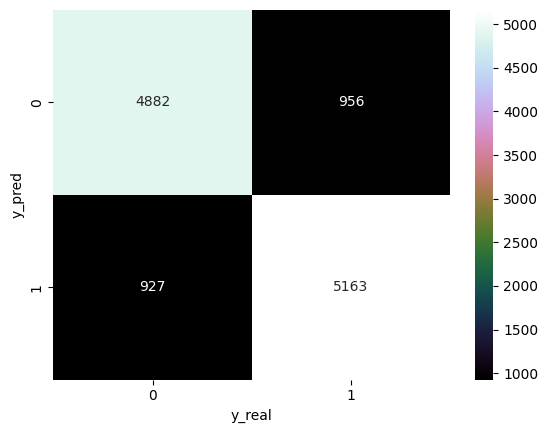

In [58]:
y_predic = nn_model.predict(x_test_escalado)
y_predic_cat = np.where(y_predic>0.5,1,0)

ds_validacion = pd.DataFrame(y_predic_cat, y_test).reset_index()
ds_validacion.columns =['y_pred', 'y_real']

print(classification_report(ds_validacion.y_pred, ds_validacion.y_real))

tabla = pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf = sns.heatmap(tabla, annot = True, cmap = 'cubehelix', fmt = 'g')
plt.show()

In [59]:
print(f1_score(y_test, y_predic_cat))

0.8457695142927348


In [60]:
accuracy = accuracy_score(y_test, y_predic_cat)
recall = recall_score(y_test, y_predic_cat)
f1 = f1_score(y_test, y_predic_cat)
precision = precision_score(y_test, y_predic_cat)

print("Accuracy: " + str(accuracy))
print("Recall: " + str(recall))
print("f1 Score: " + str(f1))
print("Precision: " + str(precision))

Accuracy: 0.8421361502347418
Recall: 0.8477832512315271
f1 Score: 0.8457695142927348
Precision: 0.8437653211309037


In [61]:
y_pred_testeo = nn_model.predict(df_test_escalado)
y_pred_testeo_cat = np.where(y_pred_testeo>0.50,1,0)
df_resultados_pred = pd.DataFrame.from_records(y_pred_testeo_cat, columns = ['resultado'])
df_summision = pd.DataFrame({'id': df_test['id'], 'is_canceled':df_resultados_pred['resultado']})
df_summision.to_csv('red_neuronal_5.csv', index = False)
df_summision

830/830 [==============================] - 1s 1ms/step


,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...,...
26530,636ccded-66ad-4538-8006-c0b9f84c6256,0
26531,11e19741-bd28-4459-8ea3-184f1664000f,0
26532,36a4c7b0-d6b1-4528-93db-311be96ec1c6,1
26533,89c85fa5-2b3d-4131-844c-e151a65ca240,1


# Red Neuronal 2

Realizamos una particion del 20% del dataframe de entrenamiento.

In [49]:
df_hotel_train_x = df_hotel_train.drop(['is_canceled'], axis = 'columns', inplace = False)
df_hotel_train_y = df_hotel_train['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(df_hotel_train_x,
                                                    df_hotel_train_y,
                                                    test_size= 0.2,
                                                    random_state = 28)

## Normalizacion de los datos

Normalizamos los datos con un StandardScaler y asi mejorar el rendimiento.

In [50]:
x_train.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'reserved_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_days', 'hotel_Resort Hotel',
       'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'country_BEL',
       'country_BRA', 'country_CHE', 'country_CHN', 'country_CN',
       'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR',
       'country_IRL', 'country_ISR', 'country_ITA', 'country_NLD',
       'country_NOR', 'country_POL', 'country_PRT', 'country_RUS',
       'country_SWE', 'country_USA', 'country_other',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'marke

In [51]:
valores_numericos_normalizar = ['lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
                                'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
                                'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
                                'reserved_room_type', 'booking_changes', 'agent','days_in_waiting_list', 'adr',
                                'required_car_parking_spaces', 'total_of_special_requests', 'total_days']

In [52]:
df_predic_normalizar = df_hotel_test[valores_numericos_normalizar]
df_train_norm = x_train[valores_numericos_normalizar]
df_test_norm = x_test[valores_numericos_normalizar]

In [53]:
scaler = StandardScaler()
scaler.fit(df_train_norm)

StandardScaler()

In [54]:
x_train_transform_1 = scaler.transform(df_train_norm)
x_test_transform_1 = scaler.transform(df_test_norm)
df_predict_transform_1 = scaler.transform(df_predic_normalizar)

In [55]:
x_train_escalado = x_train.copy()
x_test_escalado = x_test.copy()
df_test_escalado = df_hotel_test.copy()

In [56]:
for i in range(len(valores_numericos_normalizar)):
  x_train_escalado[valores_numericos_normalizar[i]] = x_train_transform_1[:,i]
  x_test_escalado[valores_numericos_normalizar[i]] = x_test_transform_1[:,i]
  df_test_escalado[valores_numericos_normalizar[i]] = df_predict_transform_1[:,i]

## Busqueda de Hiperparametros

In [58]:
d_in = len(x_train_escalado.columns)
cant_classes = len(np.unique(x_train))

def create_model_nn(neuronas, learning_rate, rho, epsilon):
  model_nn = keras.Sequential([
      keras.layers.Dense(d_in, input_shape = (d_in,)),
      keras.layers.Dense(neuronas, activation = 'relu'),
      keras.layers.Dense(1, activation = 'sigmoid')
  ])

  model_nn.compile(
      optimizer = keras.optimizers.Adadelta(learning_rate = learning_rate,
                                           epsilon = epsilon,
                                           #epsilon_2 = epsilon_2,
                                           rho = rho,
                                      ),
      loss = 'binary_crossentropy',
      metrics = ['AUC'],
  )
  return model_nn


nn_clasificador = KerasClassifier(build_fn = create_model_nn, verbose = 3)

params_grid = {
    'neuronas': list(range(20,60)),
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    #'epsilon_1': [1e-10, 1e-20,1e-30, 1e-40, 1e-50, 1e-60],
    #'epsilon_2': [0.01, 0.001, 0.0001],
    'rho': [0.85, 0.90, 0.95, 0.99, 0.999],
    'epsilon': [1e-5, 1e-6, 1e-7, 1e-8, 1e-9],
    'batch_size':[5, 10, 15, 20, 25, 30, 35, 40],
    #'epochs': [50, 100, 200]
}

folds = 5

kfoldcv = StratifiedKFold(n_splits = folds)
scorer_fn = make_scorer(sk.metrics.f1_score)

randomcv = RandomizedSearchCV(estimator = nn_clasificador,
                              param_distributions = params_grid,
                              scoring = scorer_fn,
                              cv = kfoldcv,
                              error_score = 'raise',
                              random_state = 28)

nn_random = randomcv.fit(x_train_escalado, y_train)

299/299 [==============================] - 1s 2ms/step


In [59]:
print('Mejores hiperparametros: ', nn_random.best_params_)
print(nn_random.best_score_)

Mejores hiperparametros:  {'rho': 0.999, 'neuronas': 37, 'learning_rate': 0.1, 'epsilon': 1e-05, 'batch_size': 10}
0.7993755278703493


In [29]:
best_fit = nn_random.best_estimator_
predict_y_test = best_fit.predict(x_test_escalado)

373/373 [==============================] - 1s 1ms/step


## Entrenamiento

In [61]:
d_in = len(x_train_escalado.columns)
cant_classes = len(np.unique(x_train))

nn_model = keras.Sequential([
    keras.layers.Dense(60, input_shape = (d_in,)),
    keras.layers.Dense(37, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

nn_model.summary()

Model: "sequential_160"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_480 (Dense)           (None, 60)                3600      
                                                                 
 dense_481 (Dense)           (None, 37)                2257      
                                                                 
 dense_482 (Dense)           (None, 1)                 38        
                                                                 
Total params: 5,895
Trainable params: 5,895
Non-trainable params: 0
_________________________________________________________________


In [62]:
nn_model.compile(
    optimizer = keras.optimizers.Adadelta(learning_rate = 0.1, epsilon = 1e-05, rho = 0.999),
    loss = 'binary_crossentropy',
    metrics = ['AUC']
)

callback = keras.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.001, patience = 10)
cant_epochs = 100
nn_model_history = nn_model.fit(x_train_escalado, y_train, epochs = cant_epochs, batch_size = 10, verbose = True, callbacks = [callback])


Epoch 1/100
4772/4772 [==============================] - 15s 3ms/step - loss: 0.3855 - auc: 0.9005
Epoch 2/100
4772/4772 [==============================] - 13s 3ms/step - loss: 0.3533 - auc: 0.9174
Epoch 3/100
4772/4772 [==============================] - 18s 4ms/step - loss: 0.3445 - auc: 0.9218
Epoch 4/100
4772/4772 [==============================] - 14s 3ms/step - loss: 0.3399 - auc: 0.9239
Epoch 5/100
4772/4772 [==============================] - 14s 3ms/step - loss: 0.3347 - auc: 0.9267
Epoch 6/100
4772/4772 [==============================] - 14s 3ms/step - loss: 0.3325 - auc: 0.9278
Epoch 7/100
4772/4772 [==============================] - 14s 3ms/step - loss: 0.3299 - auc: 0.9290
Epoch 8/100
4772/4772 [==============================] - 15s 3ms/step - loss: 0.3269 - auc: 0.9303
Epoch 9/100
4772/4772 [==============================] - 14s 3ms/step - loss: 0.3265 - auc: 0.9304
Epoch 10/100
4772/4772 [==============================] - 14s 3ms/step - loss: 0.3238 - auc: 0.9317
Epoch 11/

## Graficos

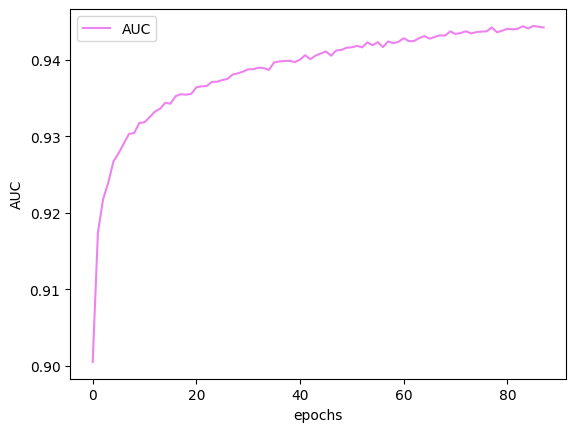

In [63]:
epochs = range (len(nn_model_history.history['auc']))

plt.plot(epochs, nn_model_history.history['auc'], color = 'violet', label ='AUC')
plt.xlabel('epochs')
plt.ylabel('AUC')
plt.legend()

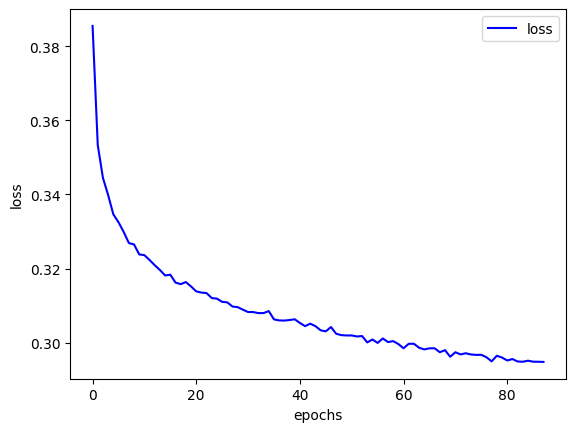

In [65]:
epochs = range(len(nn_model_history.history['loss']))
plt.plot(epochs, nn_model_history.history['loss'], color = 'blue', label = 'loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## Prediccion

373/373 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5838
           1       0.85      0.85      0.85      6090

    accuracy                           0.85     11928
   macro avg       0.85      0.85      0.85     11928
weighted avg       0.85      0.85      0.85     11928



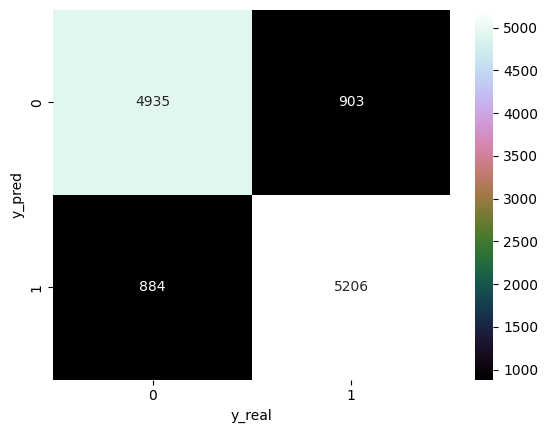

In [66]:
y_predic = nn_model.predict(x_test_escalado)
y_predic_cat = np.where(y_predic>0.5,1,0)

ds_validacion = pd.DataFrame(y_predic_cat, y_test).reset_index()
ds_validacion.columns =['y_pred', 'y_real']

print(classification_report(ds_validacion.y_pred, ds_validacion.y_real))

tabla = pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf = sns.heatmap(tabla, annot = True, cmap = 'cubehelix', fmt = 'g')
plt.show()

In [68]:
print(f1_score(y_test, y_predic_cat))

0.8535125829986064


In [70]:
accuracy = accuracy_score(y_test, y_predic_cat)
recall = recall_score(y_test, y_predic_cat)
f1 = f1_score(y_test, y_predic_cat)
precision = precision_score(y_test, y_predic_cat)

print("Accuracy: " + str(accuracy))
print("Recall: " + str(recall))
print("f1 Score: " + str(f1))
print("Precision: " + str(precision))

Accuracy: 0.8501844399731724
Recall: 0.8548440065681445
f1 Score: 0.8535125829986064
Precision: 0.8521853003764936


In [69]:
y_pred_testeo = nn_model.predict(df_test_escalado)
y_pred_testeo_cat = np.where(y_pred_testeo>0.50,1,0)
df_resultados_pred = pd.DataFrame.from_records(y_pred_testeo_cat, columns = ['resultado'])
df_summision = pd.DataFrame({'id': df_test['id'], 'is_canceled':df_resultados_pred['resultado']})
df_summision.to_csv('red_neuronal_7.csv', index = False)
df_summision

830/830 [==============================] - 1s 1ms/step


,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...,...
26530,636ccded-66ad-4538-8006-c0b9f84c6256,0
26531,11e19741-bd28-4459-8ea3-184f1664000f,0
26532,36a4c7b0-d6b1-4528-93db-311be96ec1c6,1
26533,89c85fa5-2b3d-4131-844c-e151a65ca240,1
